## Pyplot Learning Notebook
created by Minhyeok Park <pmh_only@pmh.codes>

In [39]:
%pip install -r requirements.txt
import pandas as pd
from matplotlib import pyplot as plt


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
df = pd.read_csv('./winemag-data-130k-v2.csv')
df = df[df['price'].notna()]

df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


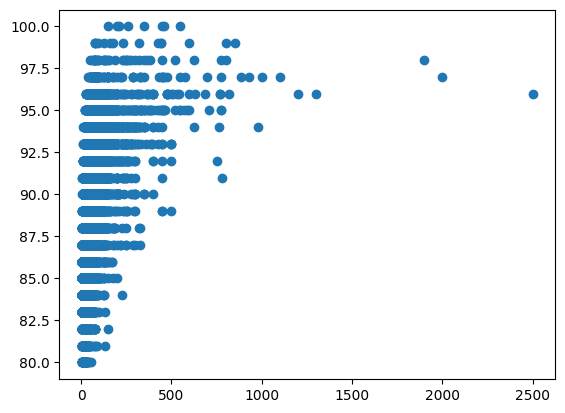

In [41]:
plt.plot(df['price'], df['points'], 'o')
plt.show()

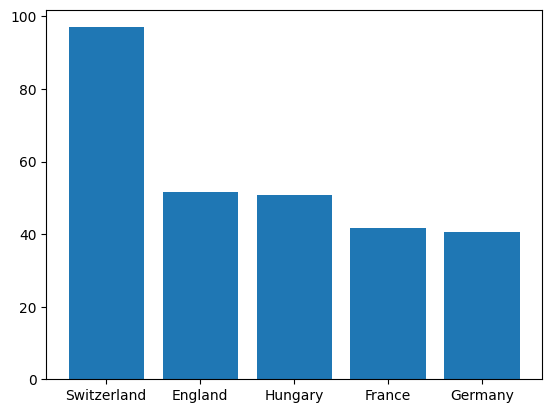

In [42]:
df2 = df.groupby(['country'])['price'].mean().sort_values(ascending=False).head(5)
plt.bar(df2.index, df2.values)
plt.show()

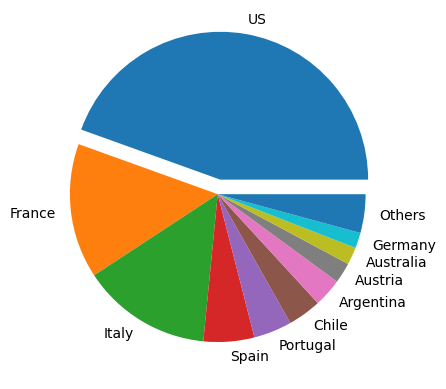

In [97]:
all_count = df['price'].count()
df2 = df.groupby('country')['price'].count().sort_values(ascending=False).map(lambda p: p / all_count * 100)
df2 = pd.concat([
  df2.head(10),
  pd.Series([
    df2[10:].sum()
  ], index=["Others"])
])

plt.pie(df2.values, labels=df2.index, explode=df2.index.map(lambda i: 0.1 if i == df2.index[0] else 0))
plt.show()